<a href="https://colab.research.google.com/github/hyunicecream/Natural-Language-Processing-NLP-/blob/main/7_14_%EC%88%98(qqp(EDA)).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

데이터의 총 질문 수: 537388
반복해서 나타나는 질문의 개수: 111894


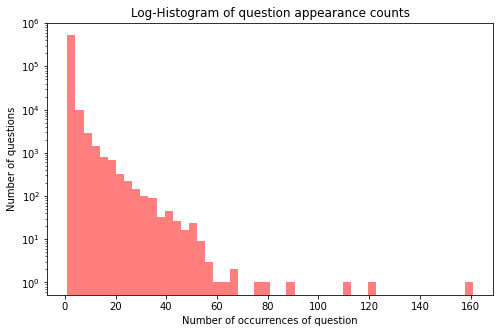

중복 최대 개수: 161
중복 최소 개수: 1
중복 평균 개수: 1.50
중복 표준편차: 1.91
중복 중간길이: 1.0
제 1 사분위 중복: 1.0
제 3 사분위 중복: 1.0


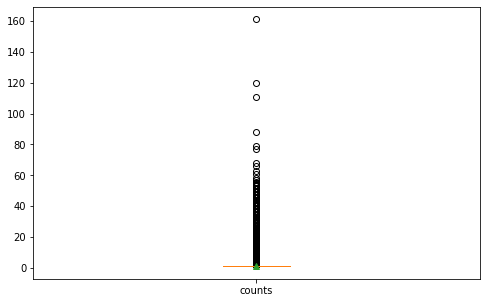

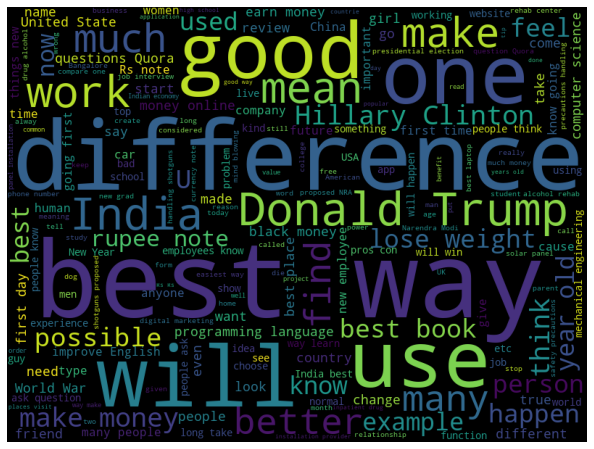

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


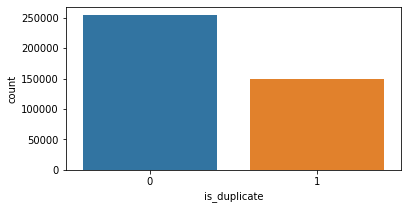

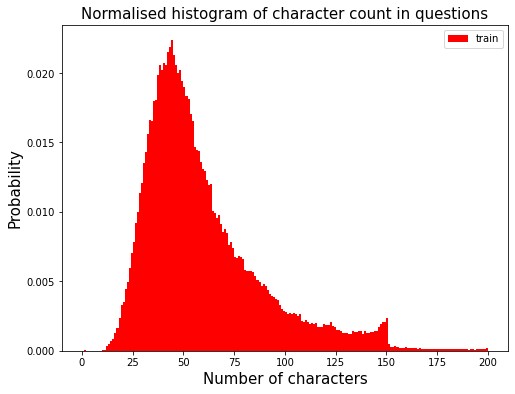

질문 길이 최대 값: 1169
질문 길이 평균 값: 59.82
질문 길이 표준편차: 31.96
질문 길이 중간 값: 51.0
질문 길이 제 1 사분위: 39.0
질문 길이 제 3 사분위: 72.0
질문 단어 개수 최대 값: 237
질문 단어 개수 평균 값: 11.06
질문 단어 개수 표준편차: 5.89
질문 단어 개수 중간 값: 10.0
질문 단어 개수 제 1 사분위: 7.0
질문 단어 개수 제 3 사분위: 13.0
질문 단어 개수 99 퍼센트: 31.0


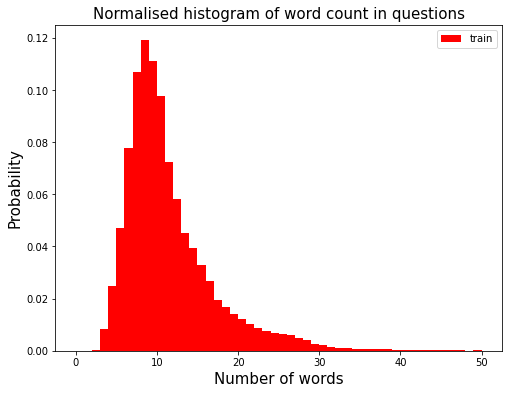

In [ ]:
# -*- coding: utf-8 -*-
"""5-1.qqp(EDA).ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1xG5UbmrWVcohZqN--49Az2NuuI2PmAW8
"""

# Quora question pairs : 데이터 분석
# ---------------------------------
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Commented out IPython magic to ensure Python compatibility.
# Quora question 데이터 읽어오기
# %cd '/content/drive/My Drive/Colab Notebooks'

train_data = pd.read_csv('/content/drive/MyDrive/머신러닝/quora_question_pairs.csv')
train_data.head()

train_set = pd.Series(train_data['question1'].tolist() + train_data['question2'].tolist()).astype(str)
train_set.head()

print('데이터의 총 질문 수: {}'.format(len(np.unique(train_set))))
print('반복해서 나타나는 질문의 개수: {}'.format(np.sum(train_set.value_counts() > 1)))

plt.figure(figsize=(8, 5))
plt.hist(train_set.value_counts(), bins=50, alpha=0.5, color= 'r', label='word')
plt.yscale('log', nonposy='clip')
plt.title('Log-Histogram of question appearance counts')
plt.xlabel('Number of occurrences of question')
plt.ylabel('Number of questions')
plt.show()

print('중복 최대 개수: {}'.format(np.max(train_set.value_counts())))
print('중복 최소 개수: {}'.format(np.min(train_set.value_counts())))
print('중복 평균 개수: {:.2f}'.format(np.mean(train_set.value_counts())))
print('중복 표준편차: {:.2f}'.format(np.std(train_set.value_counts())))
print('중복 중간길이: {}'.format(np.median(train_set.value_counts())))
print('제 1 사분위 중복: {}'.format(np.percentile(train_set.value_counts(), 25)))
print('제 3 사분위 중복: {}'.format(np.percentile(train_set.value_counts(), 75)))

plt.figure(figsize=(8, 5))
plt.boxplot([train_set.value_counts()], labels=['counts'], showmeans=True)
plt.show()

from wordcloud import WordCloud
cloud = WordCloud(width=800, height=600).generate(" ".join(train_set.astype(str)))

plt.figure(figsize=(12, 8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(6, 3)
sns.countplot(train_data['is_duplicate'])
plt.show()

train_length = train_set.apply(len)
plt.figure(figsize=(8, 6))
plt.hist(train_length, bins=200, range=[0,200], facecolor='r', density=True, label='train')
plt.title("Normalised histogram of character count in questions", fontsize=15)
plt.legend()
plt.xlabel('Number of characters', fontsize=15)
plt.ylabel('Probability', fontsize=15)
plt.show()

print('질문 길이 최대 값: {}'.format(np.max(train_length)))
print('질문 길이 평균 값: {:.2f}'.format(np.mean(train_length)))
print('질문 길이 표준편차: {:.2f}'.format(np.std(train_length)))
print('질문 길이 중간 값: {}'.format(np.median(train_length)))
print('질문 길이 제 1 사분위: {}'.format(np.percentile(train_length, 25)))
print('질문 길이 제 3 사분위: {}'.format(np.percentile(train_length, 75)))

train_word_counts = train_set.apply(lambda x:len(x.split(' ')))
plt.figure(figsize=(8, 6))
plt.hist(train_word_counts, bins=50, range=[0, 50], facecolor='r', density=True, label='train')
plt.title('Normalised histogram of word count in questions', fontsize=15)
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Probability', fontsize=15)

print('질문 단어 개수 최대 값: {}'.format(np.max(train_word_counts)))
print('질문 단어 개수 평균 값: {:.2f}'.format(np.mean(train_word_counts)))
print('질문 단어 개수 표준편차: {:.2f}'.format(np.std(train_word_counts)))
print('질문 단어 개수 중간 값: {}'.format(np.median(train_word_counts)))
print('질문 단어 개수 제 1 사분위: {}'.format(np.percentile(train_word_counts, 25)))
print('질문 단어 개수 제 3 사분위: {}'.format(np.percentile(train_word_counts, 75)))
print('질문 단어 개수 99 퍼센트: {}'.format(np.percentile(train_word_counts, 99)))